In [2]:
from pint import UnitRegistry

ureg = UnitRegistry()
Q_ = ureg.Quantity

And of course we'll need `numpy`.

In [3]:
import numpy as np

## Basics

In [4]:
distance = 10 * ureg.meter

In [5]:
print( distance.magnitude )
print( distance.units )
print( distance.dimensionality )

10
meter
[length]


In [6]:
print( distance.to(ureg.nanometer))

9999999999.999998 nanometer


In [7]:
d1 = 5 * ureg.meter
d2 = 5 * ureg.millimeter

d1+d2

5.005 meter

## Printing Units

Notice `pint` prints the full unit name by default.

In [8]:
tip_height = Q_('0.3 nm')
print(tip_height)

0.3 nanometer


To get abbreviations,

In [9]:
print( 'tip_height = {:~}'.format(tip_height))

tip_height = 0.3 nm


## Numpy

Since `nanonispy` imports height data in meters, we'll want to convert to nanometers to plot.

In [10]:
heights = np.array([0.1,0.2,0.3])*10**-9 * ureg.meter
print(heights)
print(heights.to(ureg.nanometer))
print(heights)

[1.e-10 2.e-10 3.e-10] meter
[0.1 0.2 0.3] nanometer
[1.e-10 2.e-10 3.e-10] meter


Notice however, `.to(...)` keeps the `heights` array intact. We'll

## Matplotlib

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
ureg.setup_matplotlib()

Plot a constantly accelerating particle with $a = 10$ m/s$^2$.

In [12]:
a = 10 * ureg.meter / (ureg.second)**2
t = np.linspace(0, 10,num=100 ) * ureg.second
y = (1/2) * a * t**2

First we plot meters on the y-axis

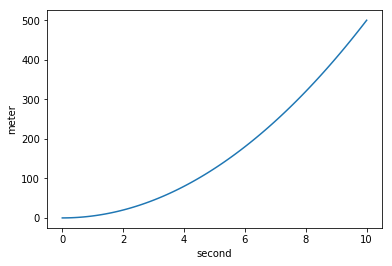

In [13]:
fig, ax = plt.subplots()
ax.plot(t, y);

Then we plot kilometers.

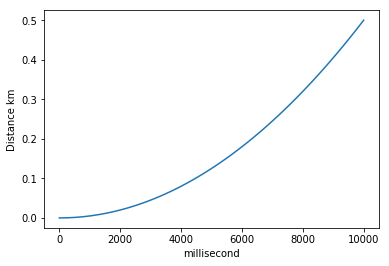

In [15]:
prefix = 'kilo'

x_unit = ureg.parse_expression('milli'+'second').units
y_unit = ureg.parse_expression(prefix + str(y.units)).units
fig, ax = plt.subplots()
ax.plot(t,y)
ax.yaxis.set_units(y_unit)
ax.xaxis.set_units(x_unit)
ax.set_ylabel('Distance {:~}'.format(y_unit));